In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch

In [4]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (1).xlsx


In [5]:
Air = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
Air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
Air.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
#Normalization
def minmax_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [8]:
airline= minmax_func(Air.iloc[:,:])
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


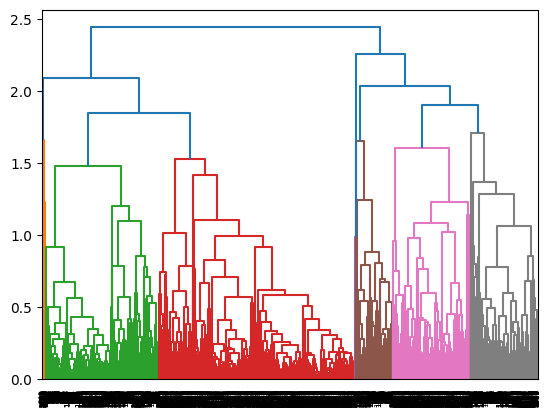

In [9]:
dendrogram = sch.dendrogram(sch.linkage(airline, method='complete'))
#dendrogram= sch.dendrogram(sch.linkage(airline, method='average'))
#dendrogram=sch.dendrogram(sch.linkage(airline,method='single'))
#dendrogram=sch.dendrogram(sch.linkage(airline,method='centroid'))

In [10]:
hc =AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [11]:
y_hc=hc.fit_predict(airline)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, ..., 0, 1, 1])

In [12]:
Air['h_clusterid']=y_hc
Air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [13]:
Air[Air['h_clusterid']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,0
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0


In [14]:
Air[Air['h_clusterid']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [15]:
Air[Air['h_clusterid']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,2
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,2
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,2
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,2


In [16]:
Air[Air['h_clusterid']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
198,202,8669,0,1,3,1,11397,16,0,0,7486,1,3
226,230,117329,0,1,2,1,6448,11,0,0,7416,1,3
381,386,167670,0,1,3,1,15907,13,0,0,6994,0,3
392,398,11189,0,1,2,1,9044,20,0,0,8296,1,3
561,568,380930,0,2,2,1,22485,25,213,1,6539,1,3
794,804,55610,0,1,2,1,5095,13,0,0,6151,0,3
940,951,44824,0,1,3,1,21107,19,2000,4,5916,1,3
1149,1161,84856,0,1,2,1,6894,13,0,0,5547,0,3
1270,1283,16103,0,1,3,1,10819,13,0,0,5427,0,3
1383,1397,18154,0,1,2,1,7748,16,0,0,5310,1,3


In [17]:
Air[Air['h_clusterid']==4]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,4
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,4
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,4
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,4
19,20,23354,0,3,1,1,10447,5,0,0,6896,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1638,194949,0,1,1,1,10121,13,4621,10,4930,1,4
1667,1683,25688,2396,1,1,1,3103,10,0,0,4754,1,4
1669,1685,288379,0,1,1,1,15942,8,1442,5,4741,1,4
1698,1714,192108,1000,1,1,1,10200,3,200,2,4656,1,4


In [18]:
Air[Air['h_clusterid']==5]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid


In [19]:
Air.groupby('h_clusterid').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clusterid,,,,,,,,,,,,
0,2014.272027,90920.413174,176.971771,2.994867,1.005988,1.021386,33532.760479,16.643285,772.680924,2.332763,4151.118905,1.000000
1,2170.906137,59971.432010,88.480947,1.712395,1.000401,1.008825,10215.097473,9.096270,227.057361,0.653028,3823.422383,0.000000
2,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
3,2113.857143,55387.685714,28.571429,1.028571,2.428571,1.000000,14254.571429,16.342857,398.657143,1.771429,4139.228571,0.285714
4,684.607383,121041.607383,491.486577,1.409396,1.000000,1.006711,10519.322148,11.456376,928.362416,2.949664,6483.204698,1.000000


In [20]:
Air['h_clusterid'].value_counts()

1    2493
0    1169
4     298
3      35
2       4
Name: h_clusterid, dtype: int64

<Axes: >

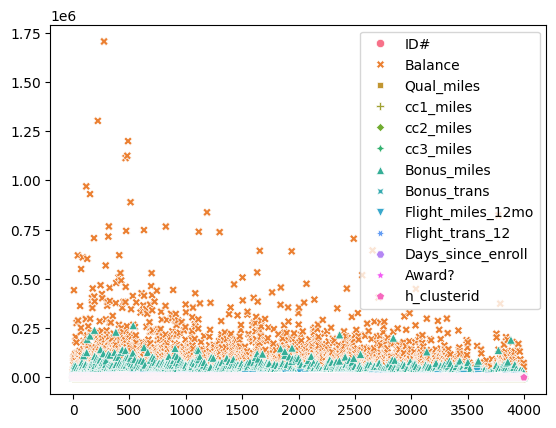

In [21]:
import seaborn as sns
sns.scatterplot(Air)

K-Mean

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [23]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (2).xlsx


In [25]:
Air = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
Air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [26]:
Air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [27]:
def minmax_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [28]:
x= minmax_func(Air.iloc[:,:])
x

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler_airline=scaler.fit_transform(Air.iloc[:,:])
scaler_airline

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

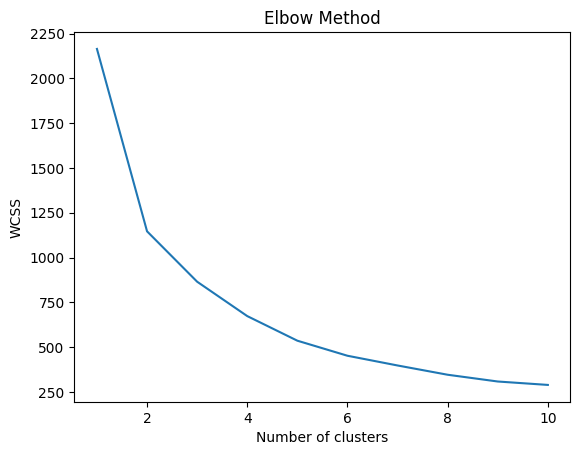

In [30]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit_predict(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
from sklearn.cluster import KMeans
clusters_new=KMeans(4,random_state=0)
clusters_new.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [32]:
clusters_new.labels_

array([2, 2, 2, ..., 1, 0, 0], dtype=int32)

In [33]:
Air['h_clusterid']=clusters_new.labels_
Air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [34]:
Air[Air['h_clusterid']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1129,1141,1625,0,1,1,1,1375,4,0,0,1547,0,0
1928,1945,3082,0,1,1,1,0,0,0,0,3923,0,0
1933,1950,11355,0,1,1,1,135,3,0,0,3916,0,0
1935,1952,50586,0,1,1,1,0,0,0,0,3902,0,0
1945,1962,32160,0,1,1,1,1130,6,250,1,3883,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [35]:
Air[Air['h_clusterid']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,1
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,1
36,37,23193,0,1,1,1,650,4,550,3,7861,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,1
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,1
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1


In [36]:
Air[Air['h_clusterid']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,6,16420,0,1,1,1,0,0,0,0,6942,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,2484,66524,0,4,1,1,34682,23,0,0,3188,0,2
2473,2492,200089,4727,5,1,1,75019,21,300,2,3166,0,2
2475,2494,135568,0,4,1,1,40051,21,0,0,3166,0,2
2500,2519,215155,0,5,1,1,57130,15,0,0,3069,0,2


In [37]:
Air[Air['h_clusterid']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,3
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,3
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,3
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,3878,190730,0,5,1,1,78916,28,2450,9,1648,1,3
3881,3904,32424,0,4,1,1,39635,16,0,0,1584,1,3
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,3
3908,3931,57642,0,4,1,1,52176,15,0,0,1564,1,3


In [38]:
Air[Air['h_clusterid']==4]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid


In [39]:
clusters_new.cluster_centers_

array([[ 7.83275779e-01,  2.48802073e-02,  8.84346578e-03,
         1.08113354e-01,  7.76397516e-03,  1.55279503e-03,
         2.70336913e-02,  9.23913043e-02,  7.28667850e-03,
         1.17778038e-02,  2.54165905e-01, -3.16413562e-15],
       [ 5.13172144e-01,  4.57984220e-02,  2.46153226e-02,
         1.08270202e-01,  1.38888889e-02,  1.89393939e-03,
         4.05913957e-02,  1.32135307e-01,  2.99861958e-02,
         5.29111873e-02,  4.90783315e-01,  1.00000000e+00],
       [ 2.85949925e-01,  4.57633072e-02,  6.82633656e-03,
         2.47764228e-01,  6.09756098e-03,  2.84552846e-03,
         5.10956085e-02,  1.20892418e-01,  7.40218088e-03,
         1.28700721e-02,  6.76382280e-01, -1.77635684e-15],
       [ 3.42945649e-01,  6.97214035e-02,  1.80181623e-02,
         7.68505080e-01,  7.25689405e-04,  7.61973875e-03,
         1.88969989e-01,  2.42582779e-01,  2.53419773e-02,
         4.46093600e-02,  6.33971854e-01,  1.00000000e+00]])

In [41]:
Air.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,3149.768634,42416.722826,98.586957,1.432453,1.015528,1.006211,7128.378882,7.945652,224.553571,0.624224,2110.052019,0.0
1,1,2063.952020,78078.890152,274.411616,1.433081,1.027778,1.007576,10703.342172,11.363636,924.084596,2.804293,4072.556818,1.0
2,2,1150.518699,78019.025203,76.100000,1.991057,1.012195,1.011382,13473.145528,10.396748,228.113008,0.682114,5611.914634,0.0
3,3,1379.641509,118863.698113,200.866473,4.074020,1.001451,1.030479,49828.551524,20.862119,780.963716,2.364296,5260.162554,1.0


In [40]:
Air['h_clusterid'].value_counts()

0    1288
2    1230
1     792
3     689
Name: h_clusterid, dtype: int64

<Axes: >

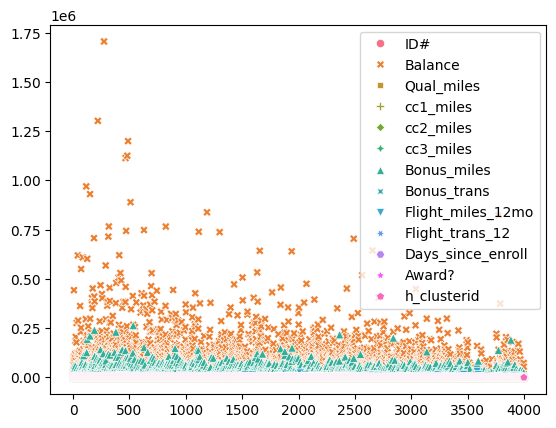

In [42]:
import seaborn as sns
sns.scatterplot(Air)

## DBSCAN

In [43]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

In [44]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines (3).xlsx


In [56]:
Air = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
Air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [57]:
data=Air.values
data

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]])

In [58]:
from sklearn.preprocessing import StandardScaler
stscaler=StandardScaler()
x=stscaler.fit_transform(data)
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [59]:
dbscan=DBSCAN(eps=3,min_samples=6)
dbscan.fit(x)

DBSCAN(eps=3, min_samples=6)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [60]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
Air['Clusterid']=dbscan.labels_
Air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [62]:
Air['Clusterid'].value_counts()

 0    3882
-1      75
 2      25
 1      13
 3       4
Name: Clusterid, dtype: int64

In [63]:
(len(Air[Air['Clusterid']==-1])/len(Air))*100

1.8754688672168043

In [64]:
from sklearn import metrics
X=metrics.silhouette_score(x,dbscan.labels_)
X

0.5098050034718856

In [65]:
Air.groupby(Air['Clusterid']).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusterid,,,,,,,,,,,,
-1,1540.426667,302361.240000,1540.000000,2.973333,1.093333,1.653333,70603.226667,30.253333,4686.960000,13.066667,5074.533333,0.826667
0,2022.293148,69402.873261,110.375837,2.049974,1.000000,1.000000,16138.731839,11.197321,380.329985,1.152756,4100.598145,0.361412
1,2152.000000,41562.307692,0.000000,1.000000,3.000000,1.000000,16338.230769,16.076923,323.076923,0.923077,4133.384615,0.307692
2,2400.600000,39187.040000,0.000000,1.120000,2.000000,1.000000,11107.040000,14.840000,224.000000,0.800000,3703.240000,0.320000
3,799.500000,178169.000000,8083.750000,3.500000,1.000000,1.000000,31592.000000,19.750000,500.000000,1.500000,6173.000000,1.000000
